In [1]:
# Plotting Script- DI Dissolution Model Comparsion

In [2]:
# Import
import pandas as pd
from pathlib import Path
import numpy as np
import subprocess
import os
import matplotlib.pyplot as plt
import math as math

dir_code = '~/projects/MINER/src'
import sys
sys.path.append(dir_code)

##### Functions to read PFLOTRAN pft and tec files ######
def read_pflotran_output(fname):
    '''Function for reading the pflotran output'''
    header = pd.read_csv(fname, nrows=0)
    data   = pd.read_csv(fname, sep='\s+', skiprows=1, names=list(header))
    data.index = data.iloc[:,0]
    return data
######################
def tec_to_dataframe(file_path, no_skiprow, column_headers):
    '''function to convert a tec PFLTORAN outfile to a dataframe'''
    df = pd.read_csv(file_path, skiprows=no_skiprow, delim_whitespace=True, header=None, names=column_headers)
    return df
#####################

In [3]:
### 1.0 Import Experimental Data
dir_data = Path('./')
f_obs_diss = os.path.join(dir_data, 'Diss_DI_data.xlsx')

# Read the observation data
diss_obs = pd.read_excel(f_obs_diss)
time_obs = diss_obs['Time [hr]']


In [4]:
# List Aqueous Species for Comparision
aq_species = ['Ni', 'Fe', 'Mn', 'Mg', 'Ca']


In [5]:
### 2.0 Post-Process PFLOTRAN outputs to match experimental data format
# Simulation Results
####### Path to folder locations
dir_model = Path('./')
f_out = './pflotran-obs-0.pft'
pf_out = read_pflotran_output(f_out)

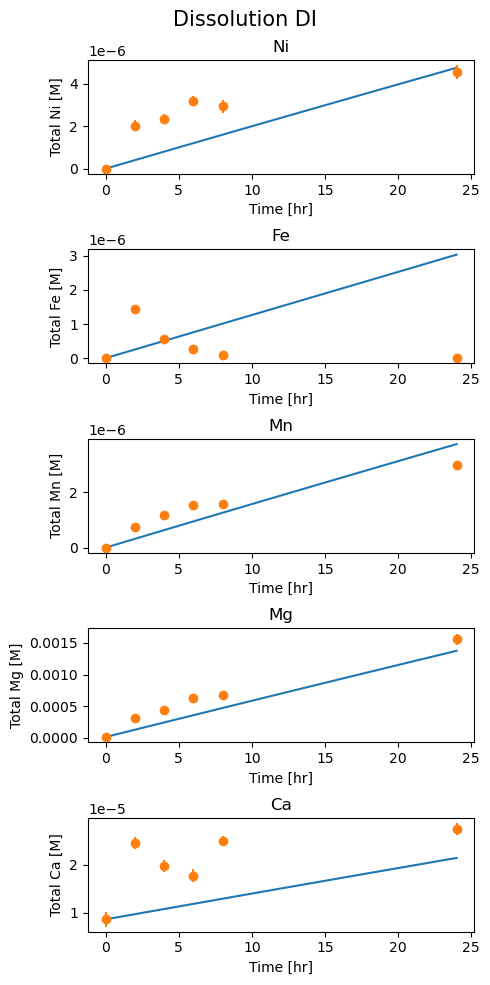

In [6]:
# Plotting Aqueous Chemistry
n_row = len(aq_species)+1
fig, ax = plt.subplots(n_row-1, 1, figsize = (5,10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

model_output_headers = ["Total Ni++ [M] pt (1) (0.028 0.028 0.028)","Total Fe++ [M] pt (1) (0.028 0.028 0.028)","Total Mn++ [M] pt (1) (0.028 0.028 0.028)","Total Mg++ [M] pt (1) (0.028 0.028 0.028)","Total Ca++ [M] pt (1) (0.028 0.028 0.028)"]

# Loop over simulation columns and extract column headers for each aq_species for comparision to observations
for j, name in enumerate(aq_species):        
    # plot simulation results
    ax[j].plot(pf_out[' "Time [hr]"'],pf_out['{}'.format(model_output_headers[j])])
    ax[j].set_title('{}'.format(name))
    ax[j].set_ylabel('Total {} [M]'.format(name))
    ax[j].set_xlabel('Time [hr]')
    
# plot observations
    if name != 'pH':
        filtered_obs = diss_obs.filter(like = '{}'.format(name))
        x_data = time_obs
        y_data = filtered_obs.iloc[:,0]
        error = filtered_obs.iloc[:,1]
        ax[j].errorbar(x_data, y_data, yerr = error, marker='o', linestyle = 'none')
plt.tight_layout()


# Plot Simulation pH
#ax[j+1].plot(pf_out[' "Time [hr]"'],pf_out['pH pt (1) (0.028 0.028 0.028)'])
#ax[j+1].set_title('pH')
#ax[j+1].set_ylabel('pH')
#ax[j+1].set_xlabel('Time [hr]')

fig.suptitle('Dissolution DI', fontsize = 15)
fig.subplots_adjust(top=0.93)
plt.show()